## Mechine Learning Menggunakan K-Nearest Neighbors (KNN)

## Menyiapkan Pustaka

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

## Load Data

In [12]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.shape

(150, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: xlabel='species', ylabel='Count'>

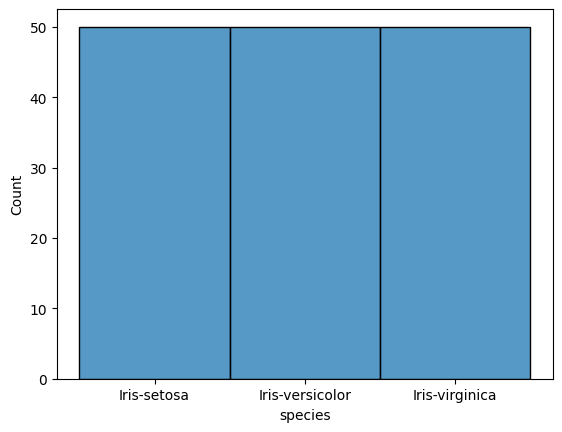

In [15]:
sns.histplot(df.species)

## Cleaning Data

In [16]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
df.duplicated().sum()

3

In [20]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [21]:
x = df.drop(columns = ['species'], axis = 1)
y = df['species']

In [45]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
data_latih, data_test, label_latih, label_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [26]:
data_latih.shape

(117, 4)

In [27]:
data_test.shape

(30, 4)

## Modeling

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [31]:
knn.fit(data_latih,label_latih)
label_pred = knn.predict(data_test)
knn_acc = accuracy_score(label_pred, label_test)

In [33]:
classification_report(label_test, label_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        11\nIris-versicolor       0.90      0.90      0.90        10\n Iris-virginica       0.89      0.89      0.89         9\n\n       accuracy                           0.93        30\n      macro avg       0.93      0.93      0.93        30\n   weighted avg       0.93      0.93      0.93        30\n'

In [37]:
print('Akurasi KNN :{:.2f}'.format(knn_acc * 100),'%')

Akurasi KNN :93.33 %


In [53]:
testing = data_test.head(1)
testing

,sepal_length,sepal_width,petal_length,petal_width
127,6.1,3.0,4.9,1.8


In [55]:
prediksi = knn.predict(testing)
prediksi[0]

'Iris-virginica'